<a href="https://www.kaggle.com/code/vitriafs/machine-learning?scriptVersionId=104272290" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Age,SibSp,Parch,Fare
0,1,0,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,886,0,39.0,0,5,29.1250
886,887,0,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
889,890,1,26.0,0,0,30.0000


,PassengerId,Age,SibSp,Parch,Fare
0,892,34.5,0,0,7.8292
1,893,47.0,1,0,7.0000
2,894,62.0,0,0,9.6875
3,895,27.0,0,0,8.6625
4,896,22.0,1,1,12.2875
...,...,...,...,...,...
413,1305,0.0,0,0,8.0500
414,1306,39.0,0,0,108.9000
415,1307,38.5,0,0,7.2500
416,1308,0.0,0,0,8.0500


,PassengerId,Survived,Age,SibSp,Parch,Fare,Age-1
0,1,0,22.0,1,0,7.2500,(20-30)
1,2,1,38.0,1,0,71.2833,(30-40)
2,3,1,26.0,0,0,7.9250,(20-30)
3,4,1,35.0,1,0,53.1000,(30-40)
4,5,0,35.0,0,0,8.0500,(30-40)
...,...,...,...,...,...,...,...
885,886,0,39.0,0,5,29.1250,(30-40)
886,887,0,27.0,0,0,13.0000,(20-30)
887,888,1,19.0,0,0,30.0000,(10-20)
889,890,1,26.0,0,0,30.0000,(20-30)


<AxesSubplot:xlabel='Age-1', ylabel='Survived'>

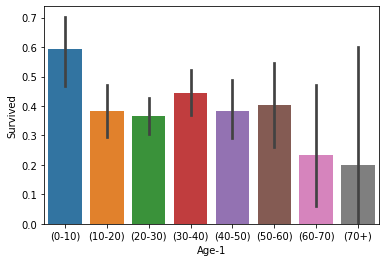

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)
#Transformar arquivos em dataframe e gerar momentos estatísticos
test = pd.read_csv("../input/titanic/test.csv")
teste = test
trein = pd.read_csv("../input/titanic/train.csv")
treino = trein
display(test.describe())
display(trein.describe())
#para descobrir o tipo de dado de cada freature
display(test.info())
display(trein.info())
#descobrir quais as Features contém NaN
print(test.isnull().sum())
print(trein.isnull().sum())
testA = test.loc[:,['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']]
treinA = trein.loc[:,['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare']]
#retirando as linhas que contenham NaN das features do banco de dados de treino
treinA = treinA.dropna()
display(treinA)
#no banco de dados de teste, substituindo os NaN pelo valor 0,
testA = testA.fillna(0)
display(testA)
#Para a Feature “Age”, criar uma nova Feature que a separe em 8 grupos para que se possa utilizar “sns.barplot”.
Age = ['(0-10)', '(10-20)', '(20-30)', '(30-40)', '(40-50)', '(50-60)', '(60-70)', '(70+)']
q = [0,10,20,30,40,50,60,70,np.inf]
treinA['Age-1'] = pd.cut(treinA['Age'],q,labels=Age)
display(treinA)
#graficos com todas as colunas
display(sns.barplot(data=treinA, x='Age-1', y='Survived'))
###analise=Crianças tem maior chance de sobreviver

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

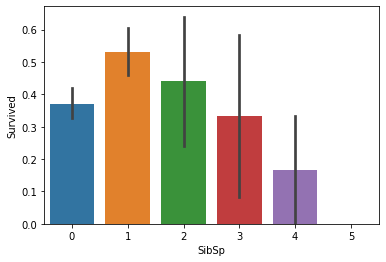

In [2]:
display(sns.barplot(data=treinA, x='SibSp', y='Survived'))
#SibSp 1 tem mais chance de sobreviver

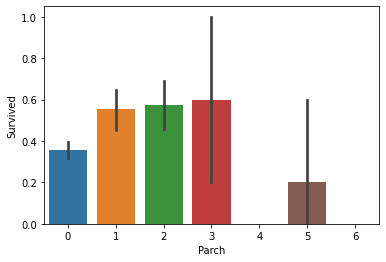

In [3]:
t = sns.barplot(data=treinA, x='Parch', y='Survived')
plt.show(t)
#Parch 3 tem mais chance de sobreviver

In [4]:
#6.3 # dividindo o dataframe de treino em train e validation
from sklearn.model_selection import train_test_split

X = treinA.drop(['Survived','Age-1', 'PassengerId'],axis = 1)
display(X)
target = treinA["Survived"]
train_X, val_X, train_y, val_y = train_test_split(X, target,test_size=0.20, random_state = 0)
# treinando o modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

modelo_titanic = RandomForestClassifier()
modelo_titanic.fit(train_X,train_y)
predt = modelo_titanic.predict(val_X)
accuracy_score(predt,val_y)

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500
...,...,...,...,...
885,39.0,0,5,29.1250
886,27.0,0,0,13.0000
887,19.0,0,0,30.0000
889,26.0,0,0,30.0000


0.6503496503496503

In [5]:
testB = testA.drop('PassengerId', axis=1)
display(testB)
gua = test['PassengerId']
pred= modelo_titanic.predict(testB)
output = pd.DataFrame({'PassengerId' : gua, 'Survived' : pred})
output.to_csv('submission.csv', index=False)
output.shape
display(output)

,Age,SibSp,Parch,Fare
0,34.5,0,0,7.8292
1,47.0,1,0,7.0000
2,62.0,0,0,9.6875
3,27.0,0,0,8.6625
4,22.0,1,1,12.2875
...,...,...,...,...
413,0.0,0,0,8.0500
414,39.0,0,0,108.9000
415,38.5,0,0,7.2500
416,0.0,0,0,8.0500


,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1


In [6]:
#7
#retirando cabin e ticket dos dataframes
teste.drop(['Cabin', 'Ticket'], axis=1)
treino.drop(['Cabin', 'Ticket'], axis=1)
#substituindo os vazios pela média de Age nos dataframes
Age_mean = teste['Age'].median()
teste['Age'] = teste['Age'].fillna(Age_mean)
newAge_mean = np.median(treino['Age'])
treino['Age'] = treino['Age'].replace(np.nan, newAge_mean)
#substituindo os vazios pela média de Fare nos dataframes
fare_mean = teste['Fare'].median()
teste['Fare'] = teste['Fare'].fillna(fare_mean)
fare_media = np.median(treino['Fare'])
treino['Fare'] = treino['Fare'].replace(np.nan, fare_media)
#substituindo os vazios pela moda de Embarked
Embarked_moda = teste['Embarked'].mode()
teste['Embarked'] = teste['Embarked'].fillna(Embarked_moda)
Embarked_mode = treino['Embarked'].mode()
treino['Embarked'] = treino['Embarked'].fillna(Embarked_mode)
#Criar Feature que separe a Feature “Age” em 5 intervalos de mesma extensão.
teste['Age-1'] = pd.cut(teste['Age'], 5)
display(teste)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age-1
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,"(30.502, 45.668]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,"(45.668, 60.834]"
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,"(60.834, 76.0]"
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,"(15.336, 30.502]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,"(15.336, 30.502]"
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S,"(15.336, 30.502]"
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,"(30.502, 45.668]"
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,"(30.502, 45.668]"
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S,"(15.336, 30.502]"


In [7]:
#Criar Feature que separe a Feature “Age” em 5 intervalos de mesma extensão.
treino['Age-1'] = pd.cut(treino['Age'],5)
display(treino)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age-1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(32.252, 48.168]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(16.336, 32.252]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(16.336, 32.252]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(16.336, 32.252]"


In [8]:
#Criar Feature que separe “Fare” em 6 intervalos que contenham o mesmo número de dados
teste['Fare-1'] = pd.qcut(teste['Fare'],6)
display(teste)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age-1,Fare-1
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,"(30.502, 45.668]","(7.762, 8.662]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,"(45.668, 60.834]","(-0.001, 7.762]"
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,"(60.834, 76.0]","(8.662, 14.454]"
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,"(15.336, 30.502]","(7.762, 8.662]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,"(15.336, 30.502]","(8.662, 14.454]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S,"(15.336, 30.502]","(7.762, 8.662]"
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,"(30.502, 45.668]","(55.969, 512.329]"
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,"(30.502, 45.668]","(-0.001, 7.762]"
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S,"(15.336, 30.502]","(7.762, 8.662]"


In [9]:
#Criar Feature que separe “Fare” em 6 intervalos que contenham o mesmo número de dados
treino['Fare-1'] = pd.qcut(treino['Fare'],6)
display(treino)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age-1,Fare-1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.336, 32.252]","(-0.001, 7.775]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(32.252, 48.168]","(52.369, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.336, 32.252]","(7.775, 8.662]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(32.252, 48.168]","(52.369, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(32.252, 48.168]","(7.775, 8.662]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(16.336, 32.252]","(8.662, 14.454]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(16.336, 32.252]","(26.0, 52.369]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,"(14.454, 26.0]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(16.336, 32.252]","(26.0, 52.369]"
